# analysis.ipynb: Analyze the data from Geant4 simulation

In [2]:
import numpy as np
from matplotlib import pyplot as plt

SiPMCount = 2

Here data is read from a csv file

In [3]:
rawData = np.loadtxt('../data/muon_z.csv', delimiter=',')

zPosition = rawData[:, 0]
energy = rawData[:, 1]
mean = np.empty((SiPMCount, rawData.shape[0]))
rms = np.empty((SiPMCount, rawData.shape[0]))

for SiPMNb in range(SiPMCount):
    mean[SiPMNb] = rawData[:, 2*SiPMNb+2]
    rms[SiPMNb] = rawData[:, 2*SiPMNb+3]

In [4]:
energyValue, indices = np.unique(energy, return_index=True)
indices = np.append(indices, -1)

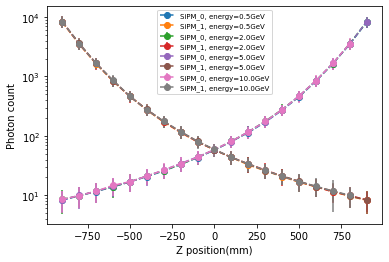

In [8]:
fig, ax = plt.subplots()
for energyIndex in range(energyValue.shape[0]):
    ax.errorbar(
        zPosition[indices[energyIndex]:indices[energyIndex+1]],
        mean[0][indices[energyIndex]:indices[energyIndex+1]],
        rms[0][indices[energyIndex]:indices[energyIndex+1]],
        fmt='o--',
        label=f"SiPM_0, energy={energyValue[energyIndex]}GeV")
    ax.errorbar(
        zPosition[indices[energyIndex]:indices[energyIndex+1]],
        mean[1][indices[energyIndex]:indices[energyIndex+1]],
        rms[1][indices[energyIndex]:indices[energyIndex+1]],
        fmt='o--',
        label=f"SiPM_1, energy={energyValue[energyIndex]}GeV")

ax.set_xlabel("Z position(mm)")
ax.set_ylabel("Photon count")
ax.set_yscale('log')
ax.legend(fontsize=7)
plt.savefig("./figure/muon_z.png", dpi=600, bbox_inches='tight')